In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_frontal_after = pd.read_csv("/content/drive/MyDrive/01ExperimentsEEGR232/EEGList/all_results_afterfrontals.csv")
df_temporal_after = pd.read_csv("/content/drive/MyDrive/01ExperimentsEEGR232/EEGList/all_results_aftertemporal.csv")
df_temporal_before = pd.read_csv("/content/drive/MyDrive/01ExperimentsEEGR232/EEGList/all_results_beforetemporal.csv")
df_frontal_before  = pd.read_csv("/content/drive/MyDrive/01ExperimentsEEGR232/EEGList/all_results_beforefrontals.csv")
df_frontal_meditation = pd.read_csv("/content/drive/MyDrive/01ExperimentsEEGR232/EEGList/all_resultsfromtals.csv")
df_temporal_meditation = pd.read_csv("/content/drive/MyDrive/01ExperimentsEEGR232/EEGList/all_resultstemporal.csv")

In [15]:
import ast
# Constants
ratios = ['Theta/Beta Ratio', 'Theta/Alpha Ratio', 'Delta/Theta Ratio', 'Theta/Gamma Ratio']
time_intervals = ['First 33%', 'Middle 33%', 'Last 33%']

def extract_ratios(df):
    """
    Extract the relevant ratios for each person and each time interval.
    """
    data = {}
    for col in df.columns[1:]:  # Skip the 'Unnamed: 0' column
        metrics = df.loc[3, col]  # Aggregated metrics are stored in the third row
        if isinstance(metrics, str):  # Check if it's a serialized string
            metrics = ast.literal_eval(metrics)
        data[col] = {ratio: [metrics[interval][ratio] for interval in time_intervals] for ratio in ratios}
    return data


In [16]:
def calculate_avg_ratios(data):
    avg_data = {}
    for ratio in ratios:
        avg_data[ratio] = [np.mean([data[person][ratio][i] for person in data]) for i in range(3)]
    return avg_data


In [14]:
# Extracting data for "Before", "During Meditation", and "After" categories
data_frontal_before = extract_ratios(df_frontal_before)
data_temporal_before = extract_ratios(df_temporal_before)
data_frontal_meditation = extract_ratios(df_frontal_meditation)
data_temporal_meditation = extract_ratios(df_temporal_meditation)
data_frontal_after = extract_ratios(df_frontal_after)
data_temporal_after = extract_ratios(df_temporal_after)

# Calculating average ratios for these categories
avg_frontal_before = calculate_avg_ratios(data_frontal_before)
avg_temporal_before = calculate_avg_ratios(data_temporal_before)
avg_frontal_meditation = calculate_avg_ratios(data_frontal_meditation)
avg_temporal_meditation = calculate_avg_ratios(data_temporal_meditation)
avg_frontal_after = calculate_avg_ratios(data_frontal_after)
avg_temporal_after = calculate_avg_ratios(data_temporal_after)


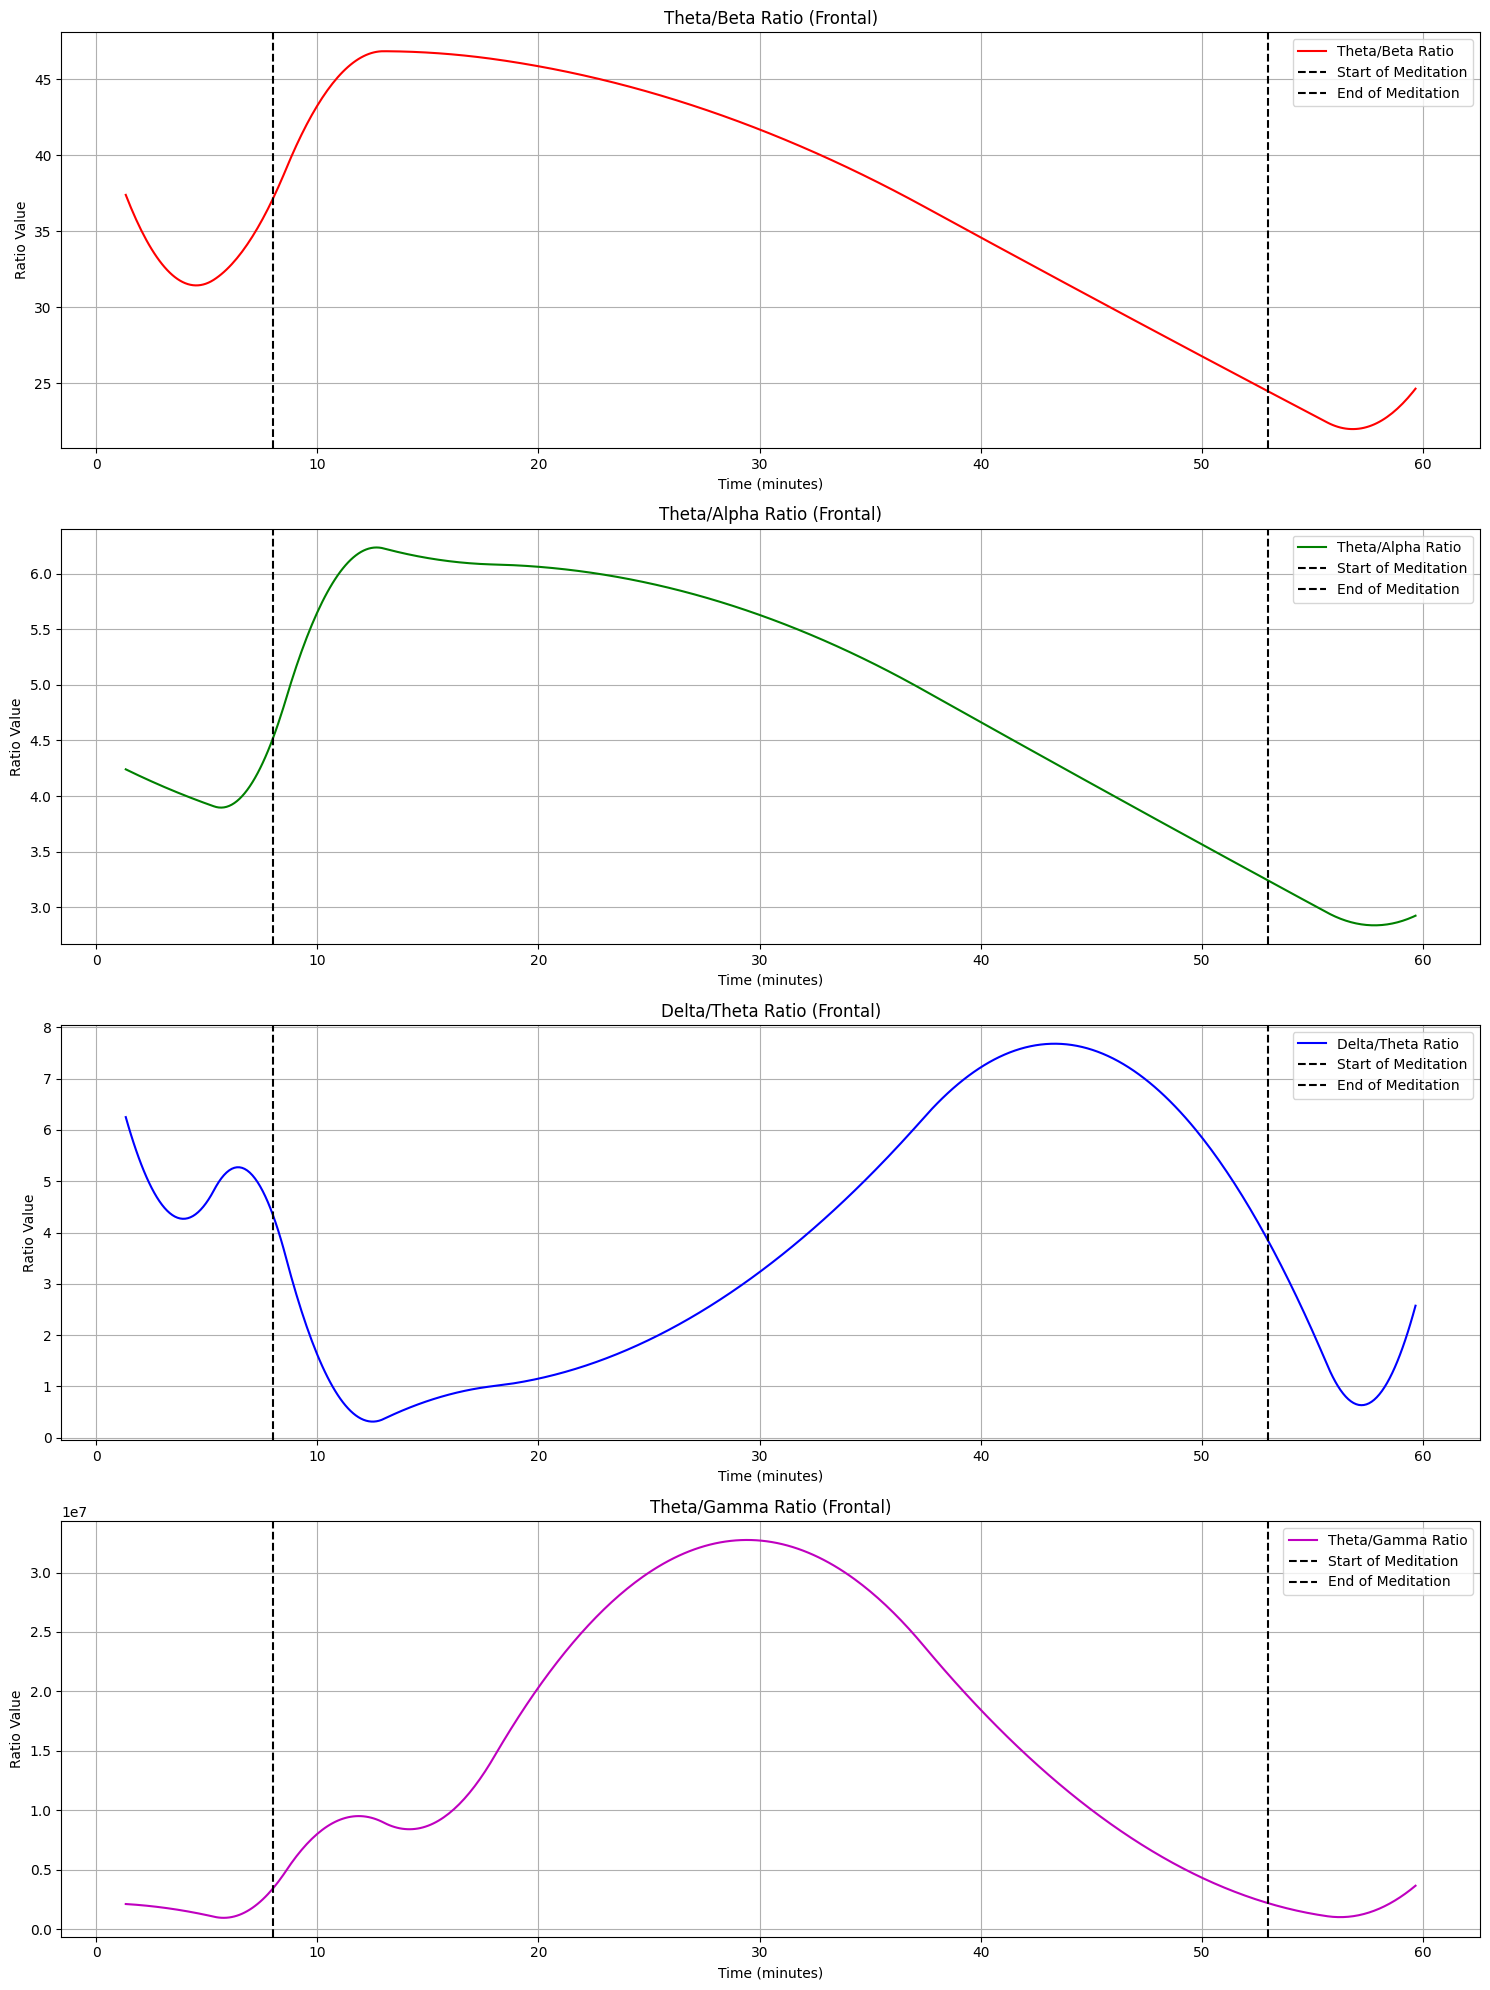

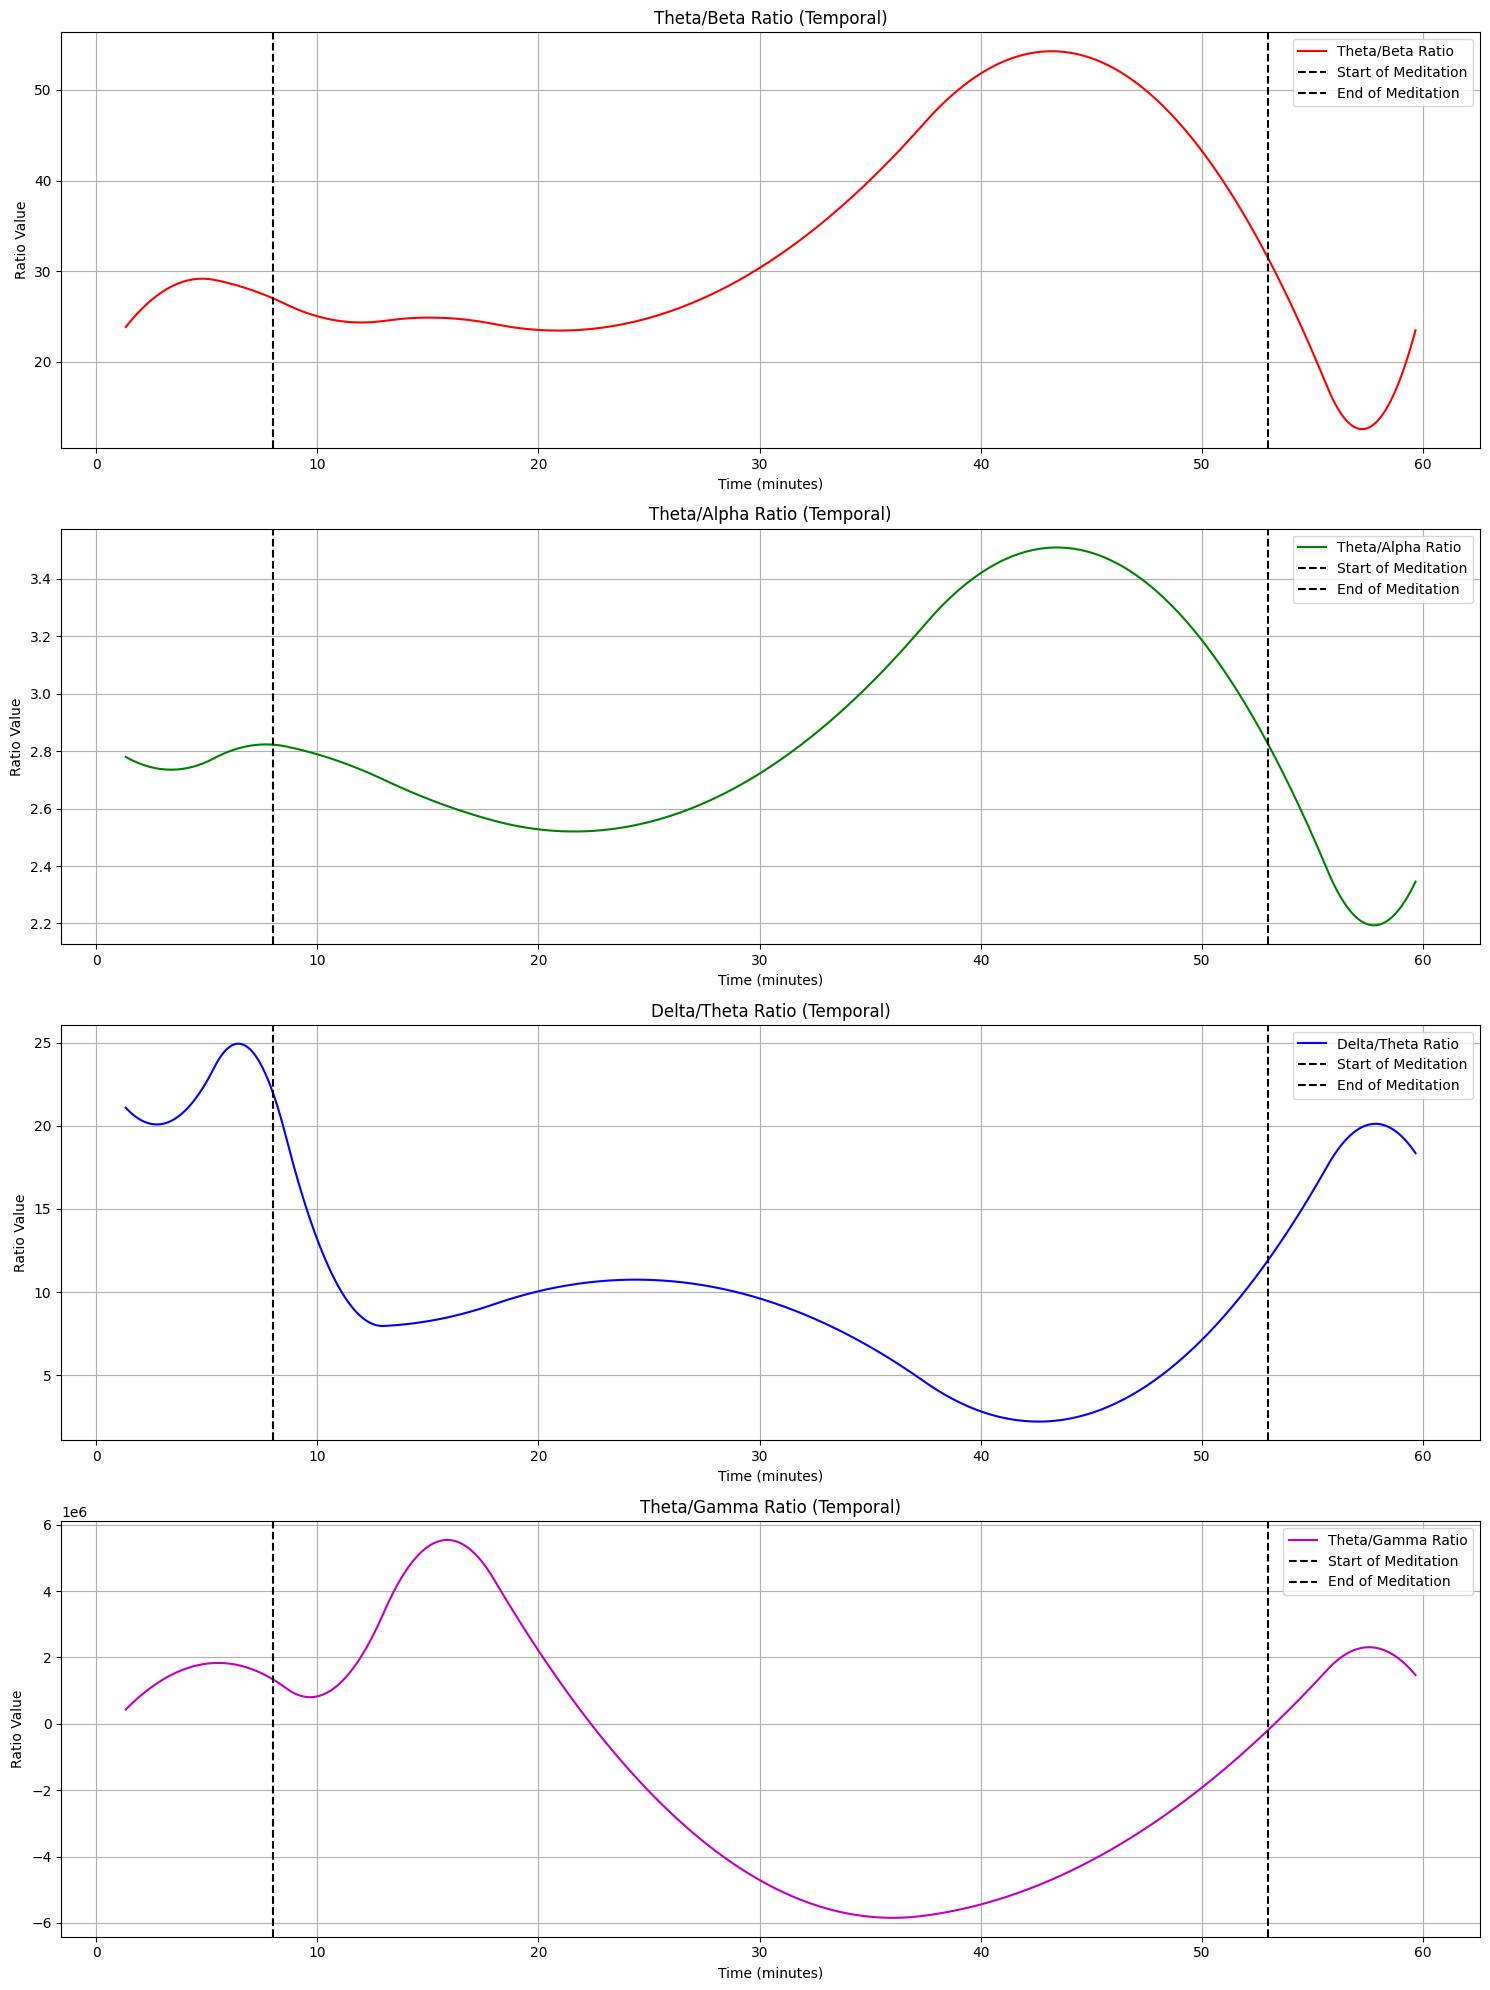

In [19]:
# Adjusting the plotting function to include the calculation of time_continuous
# Adjusting the midpoints
midpoints_before_after = [8/3 * 0.5, 8/3 * 1.5, 8/3 * 2.5]  # For the 8-minute "Before" and "After" periods
midpoints_during = [15/3 * 0.5 + 8, 15/3 * 1.5 + 8, 15/3 * 2.5 + 8]  # For the 45-minute "During Meditation" period

# Consolidated midpoints for the entire session
midpoints_continuous = midpoints_before_after + midpoints_during + [i + 8 + 45 for i in midpoints_before_after]
midpoints_continuous

def plot_continuous_ratios_fixed_v2(before_avg, meditation_avg, after_avg, region):
    fig, axs = plt.subplots(4, 1, figsize=(15, 20))
    time_before = midpoints_before_after
    time_meditation = midpoints_during
    time_after = [i + 53 for i in midpoints_before_after]  # 53 = 8 + 45
    time_continuous = time_before + time_meditation + time_after

    for idx, (ratio, color) in enumerate(zip(ratios, ['r', 'g', 'b', 'm'])):
        values_continuous = before_avg[ratio] + meditation_avg[ratio] + after_avg[ratio]
        spline = make_interp_spline(time_continuous, values_continuous, k=2)
        ynew = spline(np.linspace(min(time_continuous), max(time_continuous), 500))
        axs[idx].plot(np.linspace(min(time_continuous), max(time_continuous), 500), ynew, label=ratio, color=color)
        axs[idx].axvline(x=8, color='k', linestyle='--', label="Start of Meditation")
        axs[idx].axvline(x=8 + 45, color='k', linestyle='--', label="End of Meditation")
        axs[idx].set_title(ratio + " (" + region + ")")
        axs[idx].set_xlabel("Time (minutes)")
        axs[idx].set_ylabel("Ratio Value")
        axs[idx].legend()
        axs[idx].grid(True)
    plt.tight_layout()
    plt.show()

# Plot for Frontal and Temporal over the entire session
plot_continuous_ratios_fixed_v2(avg_frontal_before, avg_frontal_meditation, avg_frontal_after, "Frontal")
plot_continuous_ratios_fixed_v2(avg_temporal_before, avg_temporal_meditation, avg_temporal_after, "Temporal")
